# CloudArch Part 2 Visualizations
In a Kubernetes cluster with a single 8-core node, run each of the six batch jobsindividually and measure their execution time. Note that you should not use any interference for this part of the study. 

Vary the number of threads (1, 2, 4, and 8). 

Plot a single line with the speedup on the y-axis (normalized time to the single thread performance $\frac{t_1}{t_n}$ where $t_i$ is the execution time for $i$ threads) and the number of threads on the x-axis.

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

%matplotlib inline

## Read Measurements

In [5]:
RESULTS_PATH = 'results/part2b'
time_used = 'real'

In [82]:
# Load the DF from results
results = pd.DataFrame(columns = ['job', 'num_threads', 'time_mean', 'speedup'])

for job_dir in os.listdir(RESULTS_PATH):
    job = job_dir[len('parsec-'):]
    job_path = os.path.join(RESULTS_PATH, job_dir)
    
    # Sorted to ensure we always go to 't1' first (should anyway)
    for thread_dir in sorted(os.listdir(job_path)):
        num_threads = int(thread_dir[1:])
        measurements = pd.read_csv(os.path.join(job_path, thread_dir, 'measurements.csv'))
        
        # Isolate it to our chosen time definition
        times = measurements[time_used]
        
        # Get mean 
        time_mean = times.mean()
        
        # Get/set mean of t1
        if num_threads == 1:
            t1_mean = time_mean
        
        # Append to DF
        results = results.append({
            'job': job,
            'num_threads': num_threads,
            'time_mean': time_mean,
            'speedup': t1_mean / time_mean
        }, ignore_index = True)

## Plot Measurements

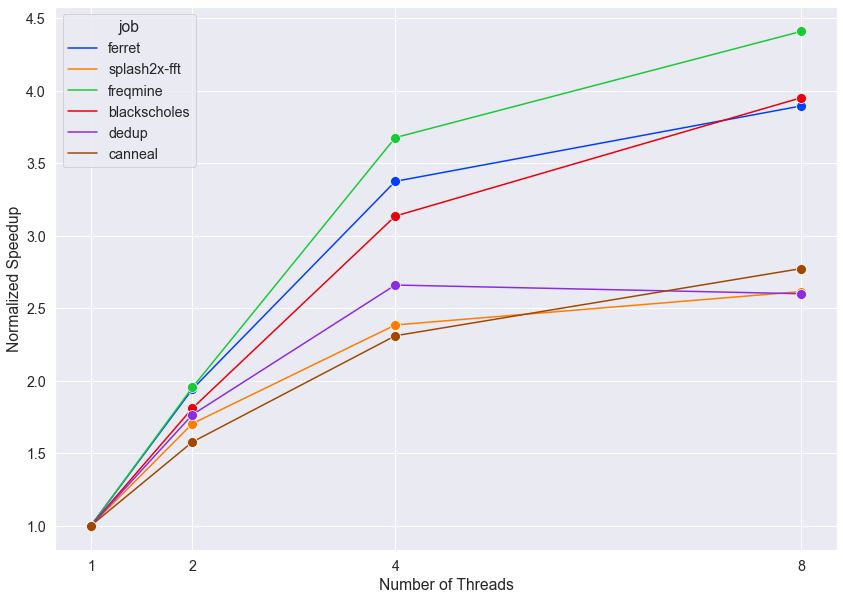

In [85]:
sns.set(style='darkgrid', font_scale=1.3)
sns.set_palette(sns.color_palette('bright'))
fig, ax = plt.subplots(figsize=(14,10))

# Titles
plt.ylabel('Normalized Speedup')
plt.xlabel('Number of Threads')

# Format X-Axis
plt.xticks([1, 2, 4, 8])

sns.lineplot(data=results, x='num_threads', y='speedup', hue='job', marker='o', markersize=10)

plt.savefig('part2_plot.png')